### Imports and functions

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 


# from src.LE_LoadAndMerge import *
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy
from src.multi_model_large_ensemble import MultiModelLargeEnsemble
import matplotlib
matplotlib.rc_file_defaults()
import string

In [7]:
def sensitivity_test(parameter,region,x_type,load,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        region.compute_x(x_type=x_type,load=load,**args)
        region.compute_LE()
        region.compute_FIT()
        internal = region.results
        internal = internal.squeeze()
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = (dataset.M_LE/(dataset.M_LE+dataset.Ibar_LE))*100
        
    return dataset

In [8]:
def sensitivity_allregions(parameter,regions,x_type,load,args):
    regions = regions
    dss = []
    for r in regions:
        tmp_args = deepcopy(args)
        ds = sensitivity_test(parameter=parameter,region=r,x_type=x_type,load=load,args=tmp_args)
        ds = ds.expand_dims('region')
        dss.append(ds)
    regions = ['Seattle', 'Montreal', 'Lagos']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    
    return final_dataset

## Sensitivity plots for paper

#### Get Data 

In [9]:
regions_dict = {
    'Seattle': {'lat': 47.6, 'lon': 237.7},
    'Sydney':  {'lat': -33.8, 'lon': 151.2},
    'Lagos':  {'lat': 6.5, 'lon': 3.4},
    'Montreal': {'lat': 45.5, 'lon': 286.2},
}

In [10]:
models = ['MIROC6', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3','cesm_lens']

In [11]:
region = 'Seattle' 
Seattle_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [12]:
region = 'Montreal' 
Montreal_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [13]:
region = 'Lagos' 
Lagos_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [14]:

region = 'Seattle' 
Seattle_tas = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [15]:
region = 'Montreal' 
Montreal_tas = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [16]:
region = 'Lagos' 
Lagos_tas = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

#### Hist slice

In [17]:
test_histslice_pr = sensitivity_allregions(parameter='hist_slice',
                                        regions=[Seattle_pr,Montreal_pr,Lagos_pr],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

13.063186645507812


13.094062805175781



100%|██████████| 1/1 [00:00<00:00,  2.43it/s]



13.09804916381836


13.10189437866211


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

13.100273132324219


100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

13.108047485351562


13.112018585205078



100%|██████████| 1/1 [00:00<00:00,  3.37it/s]



13.107776641845703


13.092559814453125


13.091156005859375






100%|██████████| 1/1 [00:00<00:00,  2.20it/s]






13.102264404296875






100%|██████████| 1/1 [00:00<00:00,  2.52it/s]






13.100399017333984






100%|██████████| 1/1 [00:00<00:00,  3.72it/s]






13.0941162109375


13.095355987548828







100%|██████████| 1/1 [00:00<00:00,  2.54it/s]







13.099288940429688


13.062488555908203


13.065059661865234


13.07684326171875


100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

13.067909240722656


13.067207336425781


13.087451934814453


13.090404510498047





100%|██████████| 1/1 [00:00<00:00,  3.55it/s]





13.076309204101562


13.081672668457031


13.078983306884766


13.081058502197266


13.080696105957031









100%|██████████| 1/1 [00:00<00:00,  3.51it/s]









13.084232330322266


13.0855712890625


13.084732055664062


13.086708068847656


100%|██████████| 1/1 [00:00<00:00,  1.53it/s]










  0%|          | 0/1 [00:00<?, ?it/s]

13.082313537597656


  0%|          | 0/1 [00:00<?, ?it/s]

13.085639953613281


100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

13.094383239746094


13.089984893798828



100%|██████████| 1/1 [00:00<00:00,  2.58it/s]



13.087970733642578



100%|██████████| 1/1 [00:00<00:00,  2.52it/s]



13.093700408935547



100%|██████████| 1/1 [00:00<00:00,  4.03it/s]



13.088970184326172


13.089759826660156




100%|██████████| 1/1 [00:00<00:00,  2.82it/s]




13.091190338134766


13.077346801757812


13.074996948242188






100%|██████████| 1/1 [00:00<00:00,  2.74it/s]






13.095329284667969


13.094459533691406


13.092926025390625


100%|██████████| 1/1 [00:00<00:00,  1.17it/s]






  0%|          | 0/1 [00:00<?, ?it/s]

13.122627258300781


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

13.131942749023438


100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


13.135055541992188


13.144580841064453



100%|██████████| 1/1 [00:00<00:00,  2.15it/s]



13.16888427734375


13.146202087402344


13.154792785644531





100%|██████████| 1/1 [00:00<00:00,  2.97it/s]





13.178768157958984


13.160686492919922


13.162925720214844


13.156425476074219


13.155143737792969










100%|██████████| 1/1 [00:00<00:00,  2.98it/s]










13.159385681152344


13.157783508300781











100%|██████████| 1/1 [00:00<00:00,  2.02it/s]











13.156497955322266


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

13.155376434326172


100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

13.156230926513672


100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


13.159984588623047


13.162189483642578


13.163990020751953


13.141345977783203


13.142391204833984






100%|██████████| 1/1 [00:00<00:00,  2.75it/s]






13.15035629272461


13.13998794555664


13.142112731933594


13.155017852783203


13.161602020263672










100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

13.158538818359375



100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

13.162010192871094


13.162181854248047


In [18]:
test_histslice_tas = sensitivity_allregions(parameter='hist_slice',
                                     regions=[Seattle_tas,Montreal_tas,Lagos_tas],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:00<00:00,  1.69it/s]



13.169631958007812


13.170379638671875




100%|██████████| 1/1 [00:00<00:00,  2.59it/s]




13.16680908203125


13.170345306396484


13.171989440917969






100%|██████████| 1/1 [00:00<00:00,  2.31it/s]






13.170211791992188


13.167919158935547







100%|██████████| 1/1 [00:00<00:00,  3.89it/s]







13.172477722167969


13.169403076171875








100%|██████████| 1/1 [00:00<00:00,  2.55it/s]








13.170860290527344


13.1715087890625


13.17245101928711


13.169029235839844


100%|██████████| 1/1 [00:00<00:00,  2.34it/s]









  0%|          | 0/1 [00:00<?, ?it/s]

13.174156188964844


  0%|          | 0/1 [00:00<?, ?it/s]

13.172595977783203


100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

13.14959716796875


13.151866912841797



100%|██████████| 1/1 [00:00<00:00,  2.98it/s]



13.160232543945312


13.155757904052734


13.152519226074219


13.170761108398438


13.168838500976562


13.173046112060547


13.174907684326172









100%|██████████| 1/1 [00:00<00:00,  2.27it/s]









13.176948547363281


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]







  0%|          | 0/1 [00:00<?, ?it/s]

13.174365997314453


100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

13.180038452148438


13.176433563232422


13.181743621826172




100%|██████████| 1/1 [00:00<00:00,  1.54it/s]




13.185771942138672


13.183483123779297


13.180858612060547






100%|██████████| 1/1 [00:00<00:00,  3.28it/s]






13.185787200927734


13.182254791259766


13.18320083618164


13.18448257446289










100%|██████████| 1/1 [00:00<00:00,  2.18it/s]










13.18472671508789










100%|██████████| 1/1 [00:00<00:00,  3.90it/s]










13.18069839477539


13.18619155883789











100%|██████████| 1/1 [00:00<00:00,  2.98it/s]











13.18234634399414


100%|██████████| 1/1 [00:01<00:00,  1.34s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

13.162097930908203


100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

13.167675018310547


13.169456481933594


13.163105010986328


13.160194396972656


13.183170318603516


13.18133544921875







100%|██████████| 1/1 [00:00<00:00,  4.25it/s]







13.185211181640625


13.185054779052734








100%|██████████| 1/1 [00:00<00:00,  1.93it/s]








13.188003540039062


13.186710357666016


13.207069396972656










100%|██████████| 1/1 [00:00<00:00,  2.51it/s]










13.179794311523438


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

13.17855453491211


  0%|          | 0/1 [00:00<?, ?it/s]

13.180473327636719


100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

13.176685333251953


100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


13.185382843017578


100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


13.181476593017578


13.187126159667969


13.180843353271484


13.18209457397461





100%|██████████| 1/1 [00:00<00:00,  2.79it/s]





13.183773040771484





100%|██████████| 1/1 [00:00<00:00,  3.99it/s]





13.17989730834961


13.186515808105469






100%|██████████| 1/1 [00:00<00:00,  2.69it/s]






13.182281494140625


13.161346435546875


13.160354614257812








100%|██████████| 1/1 [00:00<00:00,  3.38it/s]






100%|██████████| 1/1 [00:08<00:00,  8.91s/it]

13.169227600097656



100%|██████████| 1/1 [00:01<00:00,  1.35s/it]






  0%|          | 0/1 [00:00<?, ?it/s]

13.164695739746094


100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

13.162605285644531


13.17703628540039


13.18368148803711




100%|██████████| 1/1 [00:00<00:00,  3.91it/s]




13.179744720458984


13.175132751464844


13.168628692626953


In [19]:
variable_dim = xr.DataArray(['tasmax', 'pr'], coords={'variable': ['tasmax', 'pr']}, name='variable')
    
test_histslice = xr.concat([test_histslice_tas, test_histslice_pr], dim=variable_dim)

100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


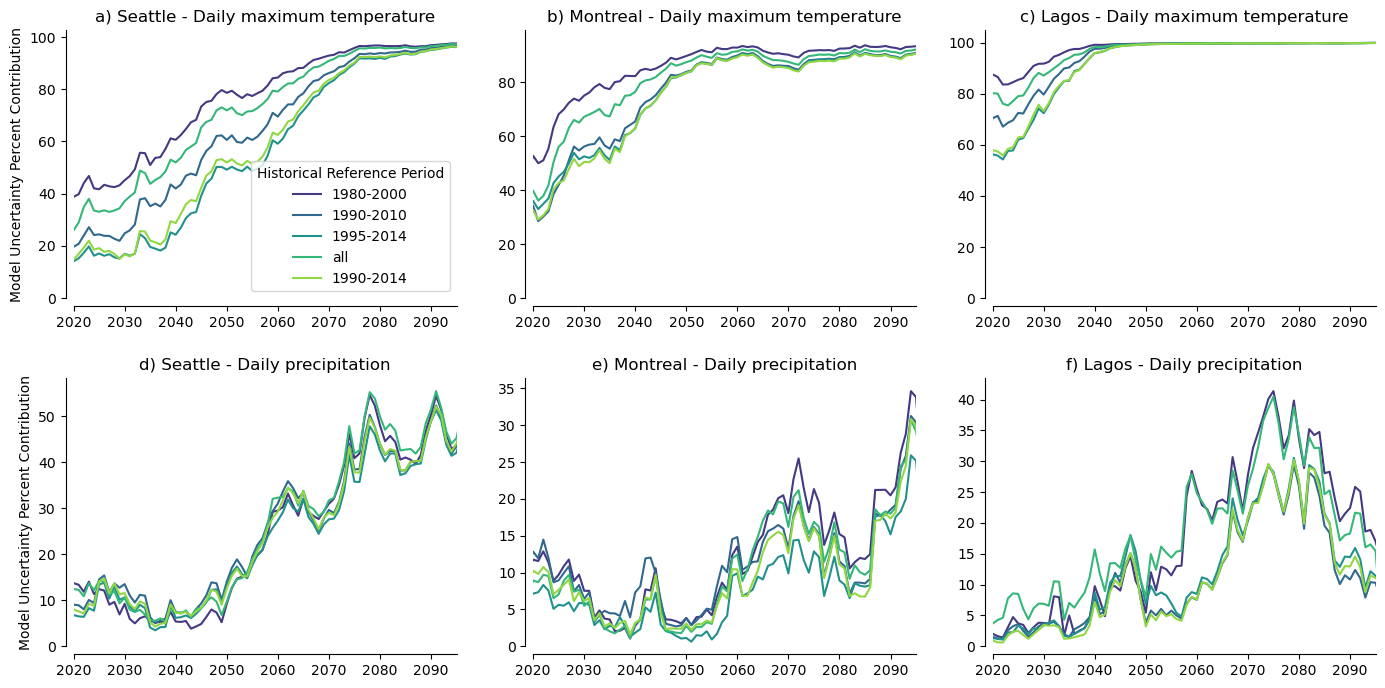

In [20]:
colors = sns.color_palette("viridis", len(test_histslice.concat_dim))
var_dict = {'tasmax': 'Daily maximum temperature', 'pr': 'Daily precipitation'}
fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))

count = 0
for iv, v in enumerate(test_histslice['variable'].values):
    for ir, r in enumerate(test_histslice.region.values):
        ax = axs[iv, ir]
        for im in range(len(test_histslice.concat_dim.values)):
            ax.plot(test_histslice.sel(variable=v,region=r).isel(concat_dim=im).time,test_histslice.sel(variable=v,region=r).isel(concat_dim=im).MTratio,c=colors[im])
            # test_return.sel(variable=v, region=r).MTratio.plot(ax=ax,c=colors[im],hue='concat_dim', lw=2,label='Model:Total ratio',add_legend=False)
        
        ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
        ax.set_ylim(bottom=0)
        ax.set_title(f'{string.ascii_lowercase[count]}) {r} - {var_dict[v]}')
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines["bottom"].set_position(("axes", -0.03)) 
        ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
        count += 1
labels = ['1980-2000','1990-2010','1995-2014','all','1990-2014']
axs[0, 0].legend(labels=labels,title='Historical Reference Period')
for ax in axs[:, 0]:
    ax.set_ylabel('Model Uncertainty Percent Contribution')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/sensitivity_testhistslice.png', dpi=200)

In [21]:
# 'non-qdm'

# Extreme events occurence

100%|██████████| 1/1 [00:06<00:00,  6.07s/it]


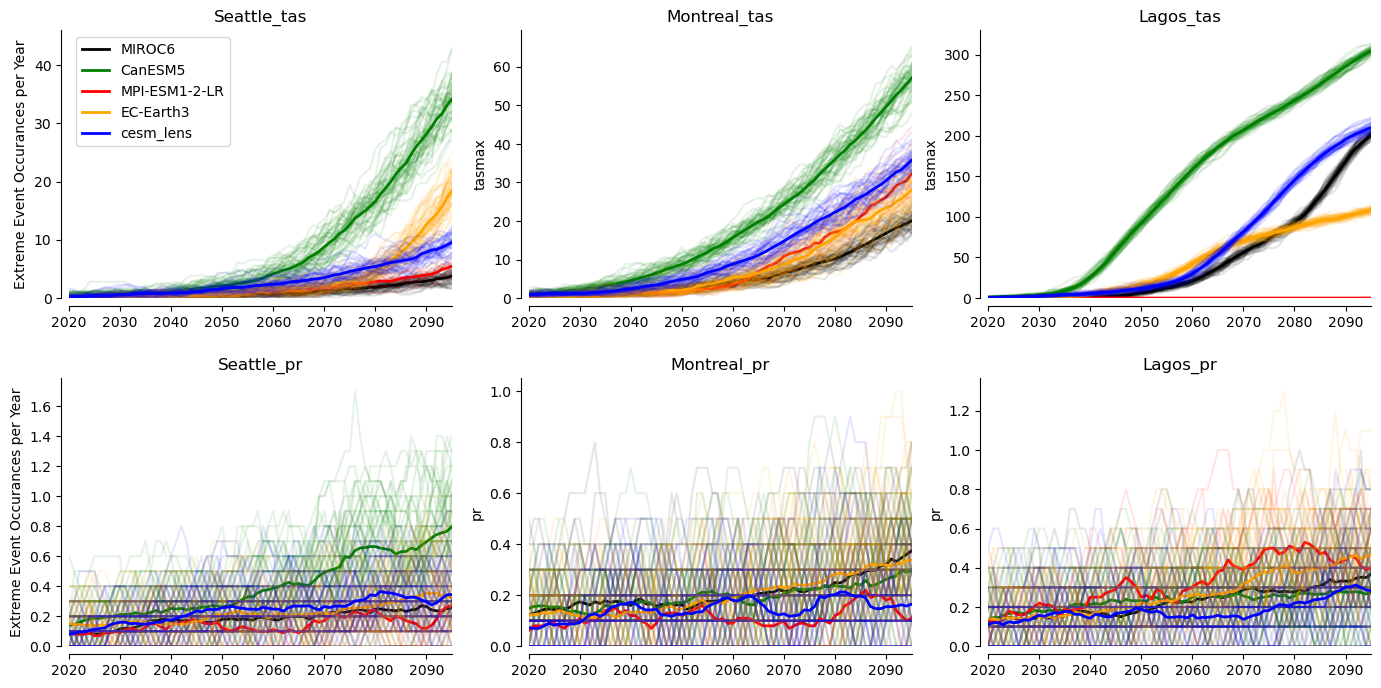

In [22]:
# Figure 1
colors = ['k','g','r','orange', 'b']

fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))
titles = ['Seattle_tas','Montreal_tas','Lagos_tas','Seattle_pr','Montreal_pr','Lagos_pr']

for ir, r in enumerate([Seattle_tas,Montreal_tas,Lagos_tas,Seattle_pr,Montreal_pr,Lagos_pr]):
    ax = axs.ravel()[ir]
    for im, m in enumerate(r.x.model.values):
        ((r.x.sel(model=m).mean('member_id'))/10).plot(ax=ax, lw=2, c=colors[im], label=m)
        ((r.x.sel(model=m))/10).plot(ax=ax, c=colors[im], hue='member_id',add_legend=False, alpha=0.1)
    ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
    ax.set_ylim(bottom=0)
    ax.set_title(f'{titles[ir]}')
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.03)) 
    ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
axs[0, 0].legend()
for ax in axs[:, 0]:
    ax.set_ylabel('Extreme Event Occurances per Year')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/region_x_ensemble.png', dpi=200)

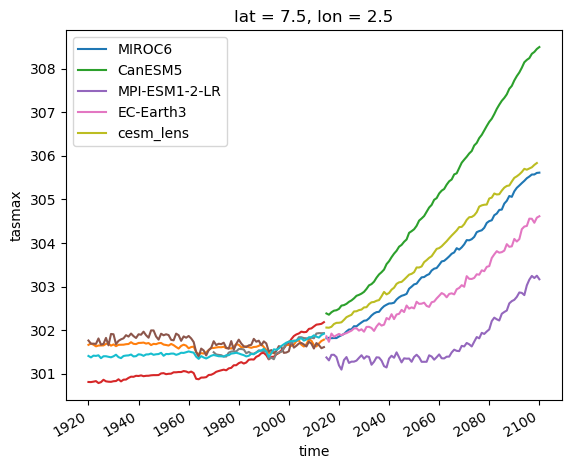

In [23]:
for model in Lagos_tas.future_dsets:
   Lagos_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot(label = model)
   Lagos_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
plt.legend()

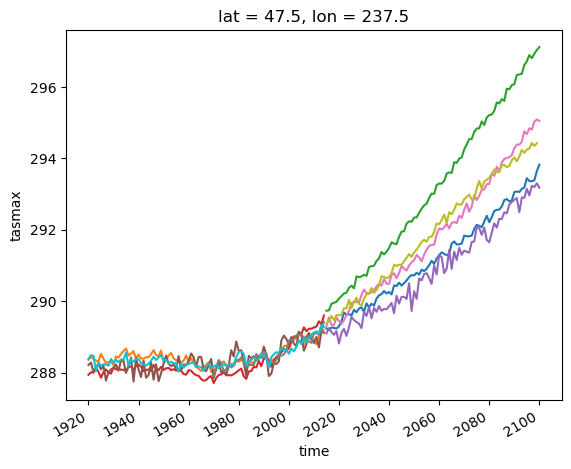

In [24]:
for model in Seattle_tas.future_dsets:
   Seattle_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
   Seattle_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()

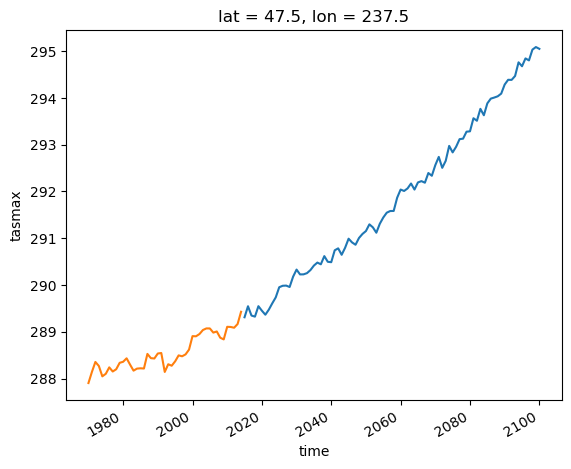

In [25]:
model = 'EC-Earth3'
Seattle_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
Seattle_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()

## No QDM

In [27]:
region = 'Seattle' 
Seattle_tas_no_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [28]:
region = 'Montreal' 
Montreal_tas_no_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [29]:
region = 'Lagos' 
Lagos_tas_no_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [30]:
region = 'Seattle' 
Seattle_pr_no_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [31]:
region = 'Montreal' 
Montreal_pr_no_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [32]:
region = 'Lagos' 
Lagos_pr_no_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

#### Hist slice

In [33]:
test_histslice_pr_no_Qdm = sensitivity_allregions(parameter='hist_slice',
                                        regions=[Seattle_pr_no_Qdm, Montreal_pr_no_Qdm, Lagos_pr_no_Qdm],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

13.574661254882812


13.587730407714844



100%|██████████| 1/1 [00:00<00:00,  1.07it/s]



13.629741668701172


13.589702606201172


13.625740051269531


13.591808319091797


13.604034423828125


13.607257843017578


13.62258529663086


13.612312316894531


13.625961303710938


13.666446685791016


13.673683166503906


13.695178985595703


13.766162872314453


13.74288558959961


13.63763427734375

















100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

















13.645343780517578


13.693744659423828


13.693290710449219


13.738758087158203


13.643199920654297





















100%|██████████| 1/1 [00:00<00:00,  1.15it/s]




















13.635265350341797


13.657718658447266
13.657299041748047
13.717155456542969
13.634864807128906
13.629463195800781
13.651893615722656
13.65378189086914
13.679218292236328
13.73992919921875





















100%|██████████| 1/1 [00:00<00:00,  1.20it/s]




















13.75112533569336


13.622501373291016
13.595390319824219
13.624523162841797
13.628711700439453





















100%|██████████| 1/1 [00:00<00:00,  1.21it/s]




















13.634498596191406


13.690521240234375


100%|██████████| 1/1 [00:03<00:00,  3.12s/it]

13.743297576904297


13.728363037109375


13.598106384277344




100%|██████████| 1/1 [00:00<00:00,  1.01it/s]




13.605873107910156


13.610416412353516


13.619564056396484


13.648807525634766


13.629627227783203


13.626407623291016


13.633235931396484


13.658340454101562


13.658733367919922


13.707408905029297













100%|██████████| 1/1 [00:00<00:00,  1.07it/s]













13.713573455810547


13.757884979248047


13.744380950927734


13.809463500976562


13.80679702758789

















100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

















13.799308776855469


13.86435317993164


13.853809356689453


13.91366195678711


13.968406677246094
13.963092803955078
13.96548843383789
13.994884490966797
13.994071960449219
14.06528091430664





















100%|██████████| 1/1 [00:00<00:00,  1.50it/s]




















14.06497573852539


14.055049896240234
14.121761322021484
14.139827728271484
14.18642807006836





















100%|██████████| 1/1 [00:00<00:00,  1.58it/s]




















14.187774658203125


13.64438247680664
13.661380767822266


In [34]:
test_histslice_tas_no_Qdm = sensitivity_allregions(parameter='hist_slice',
                                     regions=[Seattle_tas_no_Qdm, Montreal_tas_no_Qdm, Lagos_tas_no_Qdm],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

13.72286605834961
13.765689849853516
13.764896392822266
13.788703918457031
13.659629821777344
13.668888092041016
13.680801391601562
13.683284759521484
13.669380187988281
13.757064819335938
13.780689239501953
13.8134765625
13.813285827636719
13.679141998291016
13.67569351196289
13.702716827392578
13.7562255859375





















100%|██████████| 1/1 [00:00<00:00,  1.42it/s]




















13.633529663085938


13.625564575195312
13.657768249511719
13.668262481689453


100%|██████████| 1/1 [00:03<00:00,  3.53s/it]

13.714466094970703


100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


13.712226867675781


13.71820068359375


13.766582489013672


13.761730194091797


13.816535949707031


13.822711944580078


13.875598907470703


13.873729705810547


13.989665985107422


13.98166275024414


13.981895446777344


14.042102813720703


14.04391098022461


14.099239349365234


14.09967041015625
















100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
















14.099346160888672


13.65810775756836


13.650260925292969


13.657955169677734


13.660888671875




















100%|██████████| 1/1 [00:00<00:00,  1.37it/s]




















13.659015655517578


13.711162567138672
13.686149597167969
13.633251190185547
13.636829376220703





















100%|██████████| 1/1 [00:00<00:00,  1.54it/s]




















13.640430450439453


13.664997100830078
13.665603637695312
13.720191955566406
13.731204986572266
13.74658203125
13.76287841796875
13.64780044555664
13.721786499023438
13.716682434082031
13.722007751464844
13.770999908447266
13.767902374267578
13.827823638916016
13.82796859741211
13.781356811523438
13.889713287353516
13.855880737304688
13.899166107177734
13.89291763305664





















100%|██████████| 1/1 [00:00<00:00,  1.02it/s]




















13.957267761230469


13.971874237060547
13.647117614746094
13.75661849975586
13.926055908203125
13.804882049560547
13.841793060302734
13.935344696044922


In [35]:
variable_dim = xr.DataArray(['tasmax', 'pr'], coords={'variable': ['tasmax', 'pr']}, name='variable')
test_histslice_no_Qdm = xr.concat([test_histslice_tas_no_Qdm, test_histslice_pr_no_Qdm], dim=variable_dim)

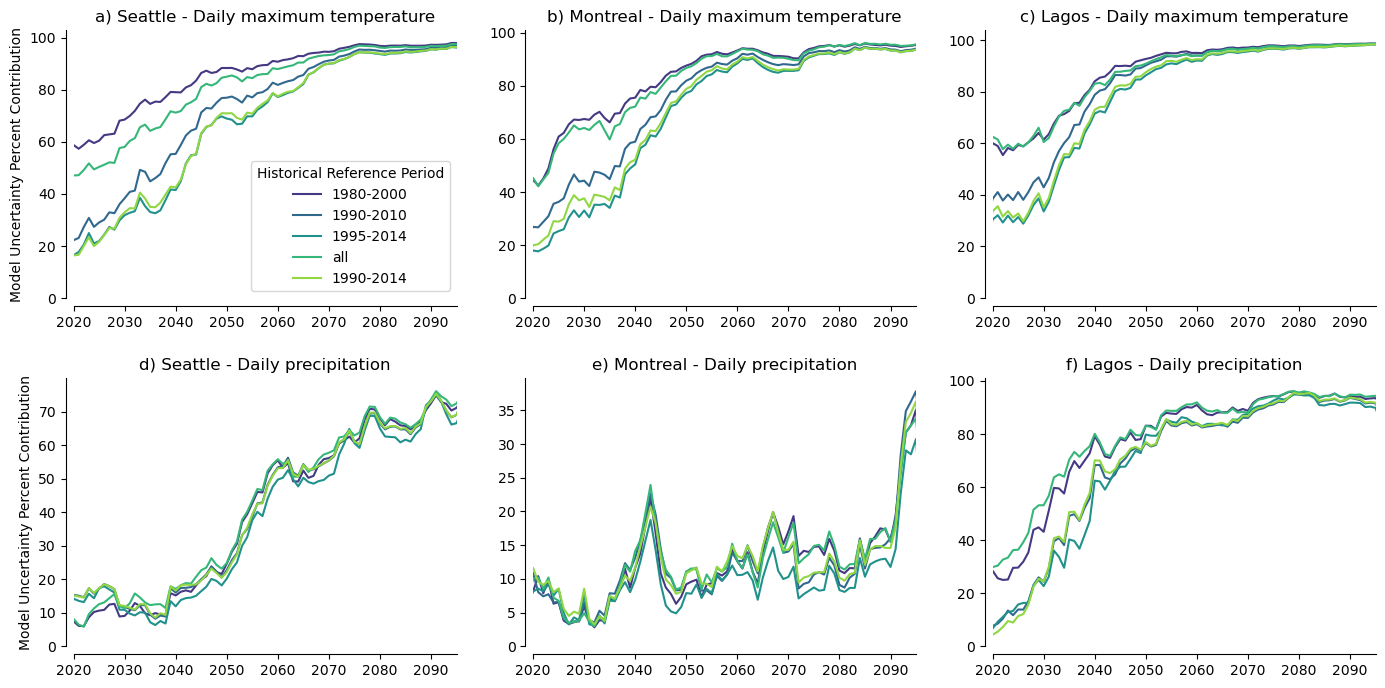

In [36]:
colors = sns.color_palette("viridis", len(test_histslice_no_Qdm.concat_dim))
var_dict = {'tasmax': 'Daily maximum temperature', 'pr': 'Daily precipitation'}
fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))

count = 0
for iv, v in enumerate(test_histslice_no_Qdm['variable'].values):
    for ir, r in enumerate(test_histslice_no_Qdm.region.values):
        ax = axs[iv, ir]
        for im in range(len(test_histslice_no_Qdm.concat_dim.values)):
            ax.plot(test_histslice_no_Qdm.sel(variable=v,region=r).isel(concat_dim=im).time,test_histslice_no_Qdm.sel(variable=v,region=r).isel(concat_dim=im).MTratio,c=colors[im])
            # test_return.sel(variable=v, region=r).MTratio.plot(ax=ax,c=colors[im],hue='concat_dim', lw=2,label='Model:Total ratio',add_legend=False)
        
        ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
        ax.set_ylim(bottom=0)
        ax.set_title(f'{string.ascii_lowercase[count]}) {r} - {var_dict[v]}')
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines["bottom"].set_position(("axes", -0.03)) 
        ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
        count += 1
labels = ['1980-2000','1990-2010','1995-2014','all','1990-2014']
axs[0, 0].legend(labels=labels,title='Historical Reference Period')
for ax in axs[:, 0]:
    ax.set_ylabel('Model Uncertainty Percent Contribution')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/sensitivity_testhistslice.png', dpi=200)

100%|██████████| 1/1 [00:12<00:00, 12.46s/it]


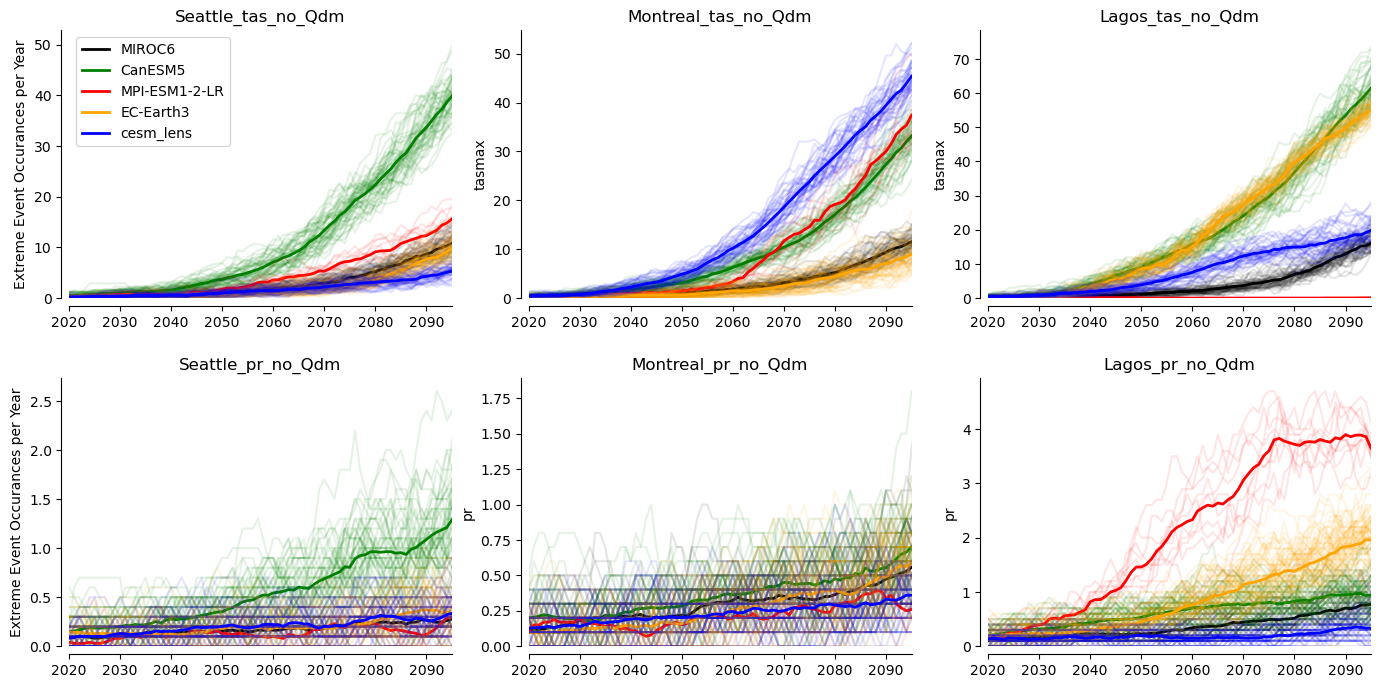

In [37]:
# Figure 1
colors = ['k','g','r','orange', 'b']

fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))
titles = ['Seattle_tas_no_Qdm','Montreal_tas_no_Qdm','Lagos_tas_no_Qdm','Seattle_pr_no_Qdm','Montreal_pr_no_Qdm','Lagos_pr_no_Qdm']

for ir, r in enumerate([Seattle_tas_no_Qdm,Montreal_tas_no_Qdm,Lagos_tas_no_Qdm,Seattle_pr_no_Qdm,Montreal_pr_no_Qdm,Lagos_pr_no_Qdm]):
    ax = axs.ravel()[ir]
    for im, m in enumerate(r.x.model.values):
        ((r.x.sel(model=m).mean('member_id'))/10).plot(ax=ax, lw=2, c=colors[im], label=m)
        ((r.x.sel(model=m))/10).plot(ax=ax, c=colors[im], hue='member_id',add_legend=False, alpha=0.1)
    ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
    ax.set_ylim(bottom=0)
    ax.set_title(f'{titles[ir]}')
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.03)) 
    ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
axs[0, 0].legend()
for ax in axs[:, 0]:
    ax.set_ylabel('Extreme Event Occurances per Year')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/region_x_ensemble.png', dpi=200)

## Lagos deep dive

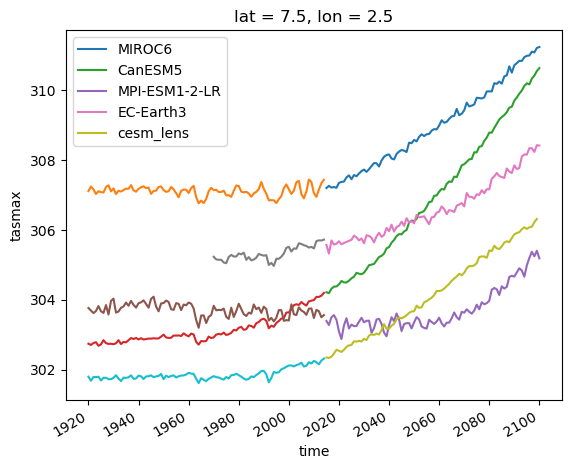

In [38]:
for model in Lagos_tas.future_dsets:
   Lagos_tas_no_Qdm.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot(label = model)
   Lagos_tas_no_Qdm.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
plt.legend()

In [39]:
    region = 'Lagos'
    path = f'gcs://climateai_data_repository/tmp/internal_variability/era_files/{region}/reanalysis_daily.zarr'
    reanalysis_daily = xr.open_zarr(path, consolidated=True).load()

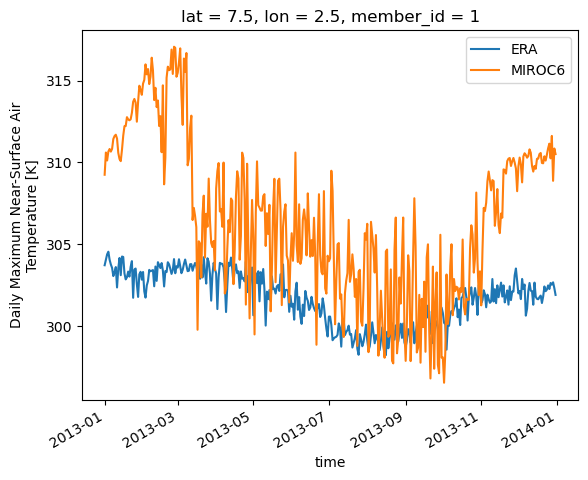

In [40]:
(reanalysis_daily+273.15).t2m_max.sel(time='2013').plot(label='ERA')
#Lagos_tas_no_Qdm.hist_dsets['CanESM5'].sel(member_id=1, time='2012').plot()
Lagos_tas_no_Qdm.hist_dsets['MIROC6'].sel(member_id=1, time='2013').plot(label='MIROC6')
plt.legend()

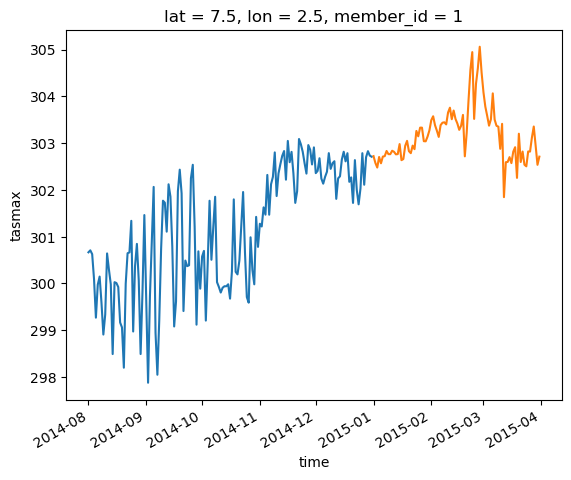

In [41]:
Lagos_tas.hist_dsets['MIROC6'].sel(member_id=1, time=slice('2014-08', None)).plot(label='MIROC6')
Lagos_tas.future_dsets['MIROC6'].sel(member_id=1, time=slice(None, '2015-03')).plot(label='MIROC6')
